#Exploratory Analysis of Geolocational Data

## Data Collection 

In [36]:
import pandas as pd
data=pd.read_csv("food_coded.csv")

In [37]:
data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,3.0,2,1.0,"My diet consists mainly of coffee, water, frui...",2,2.0,I have noticed there is less time for a prepar...,1,3,2,1.0,4,2.0,4.0,Accountant,Italian,1,1.0,Stromboli Mac and Cheese and Pizza,1,5,4,5,5,mainly protein and vegetables with a complex c...,My ideal diet would consist of a majority of w...,6,4.0,3,5,7.0,1.0,"pasta, fish, steak",3.0,Radiological Technician,5,3.0,1,4,3.0

#Data Cleaning

The process of Extracting the features, (and dealing with different kinds of values as well as NaN values) is known as Data Cleaning.

In [38]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [39]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [40]:
d=data[column]

In [41]:
d

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


## Data Exploration and Visualisation




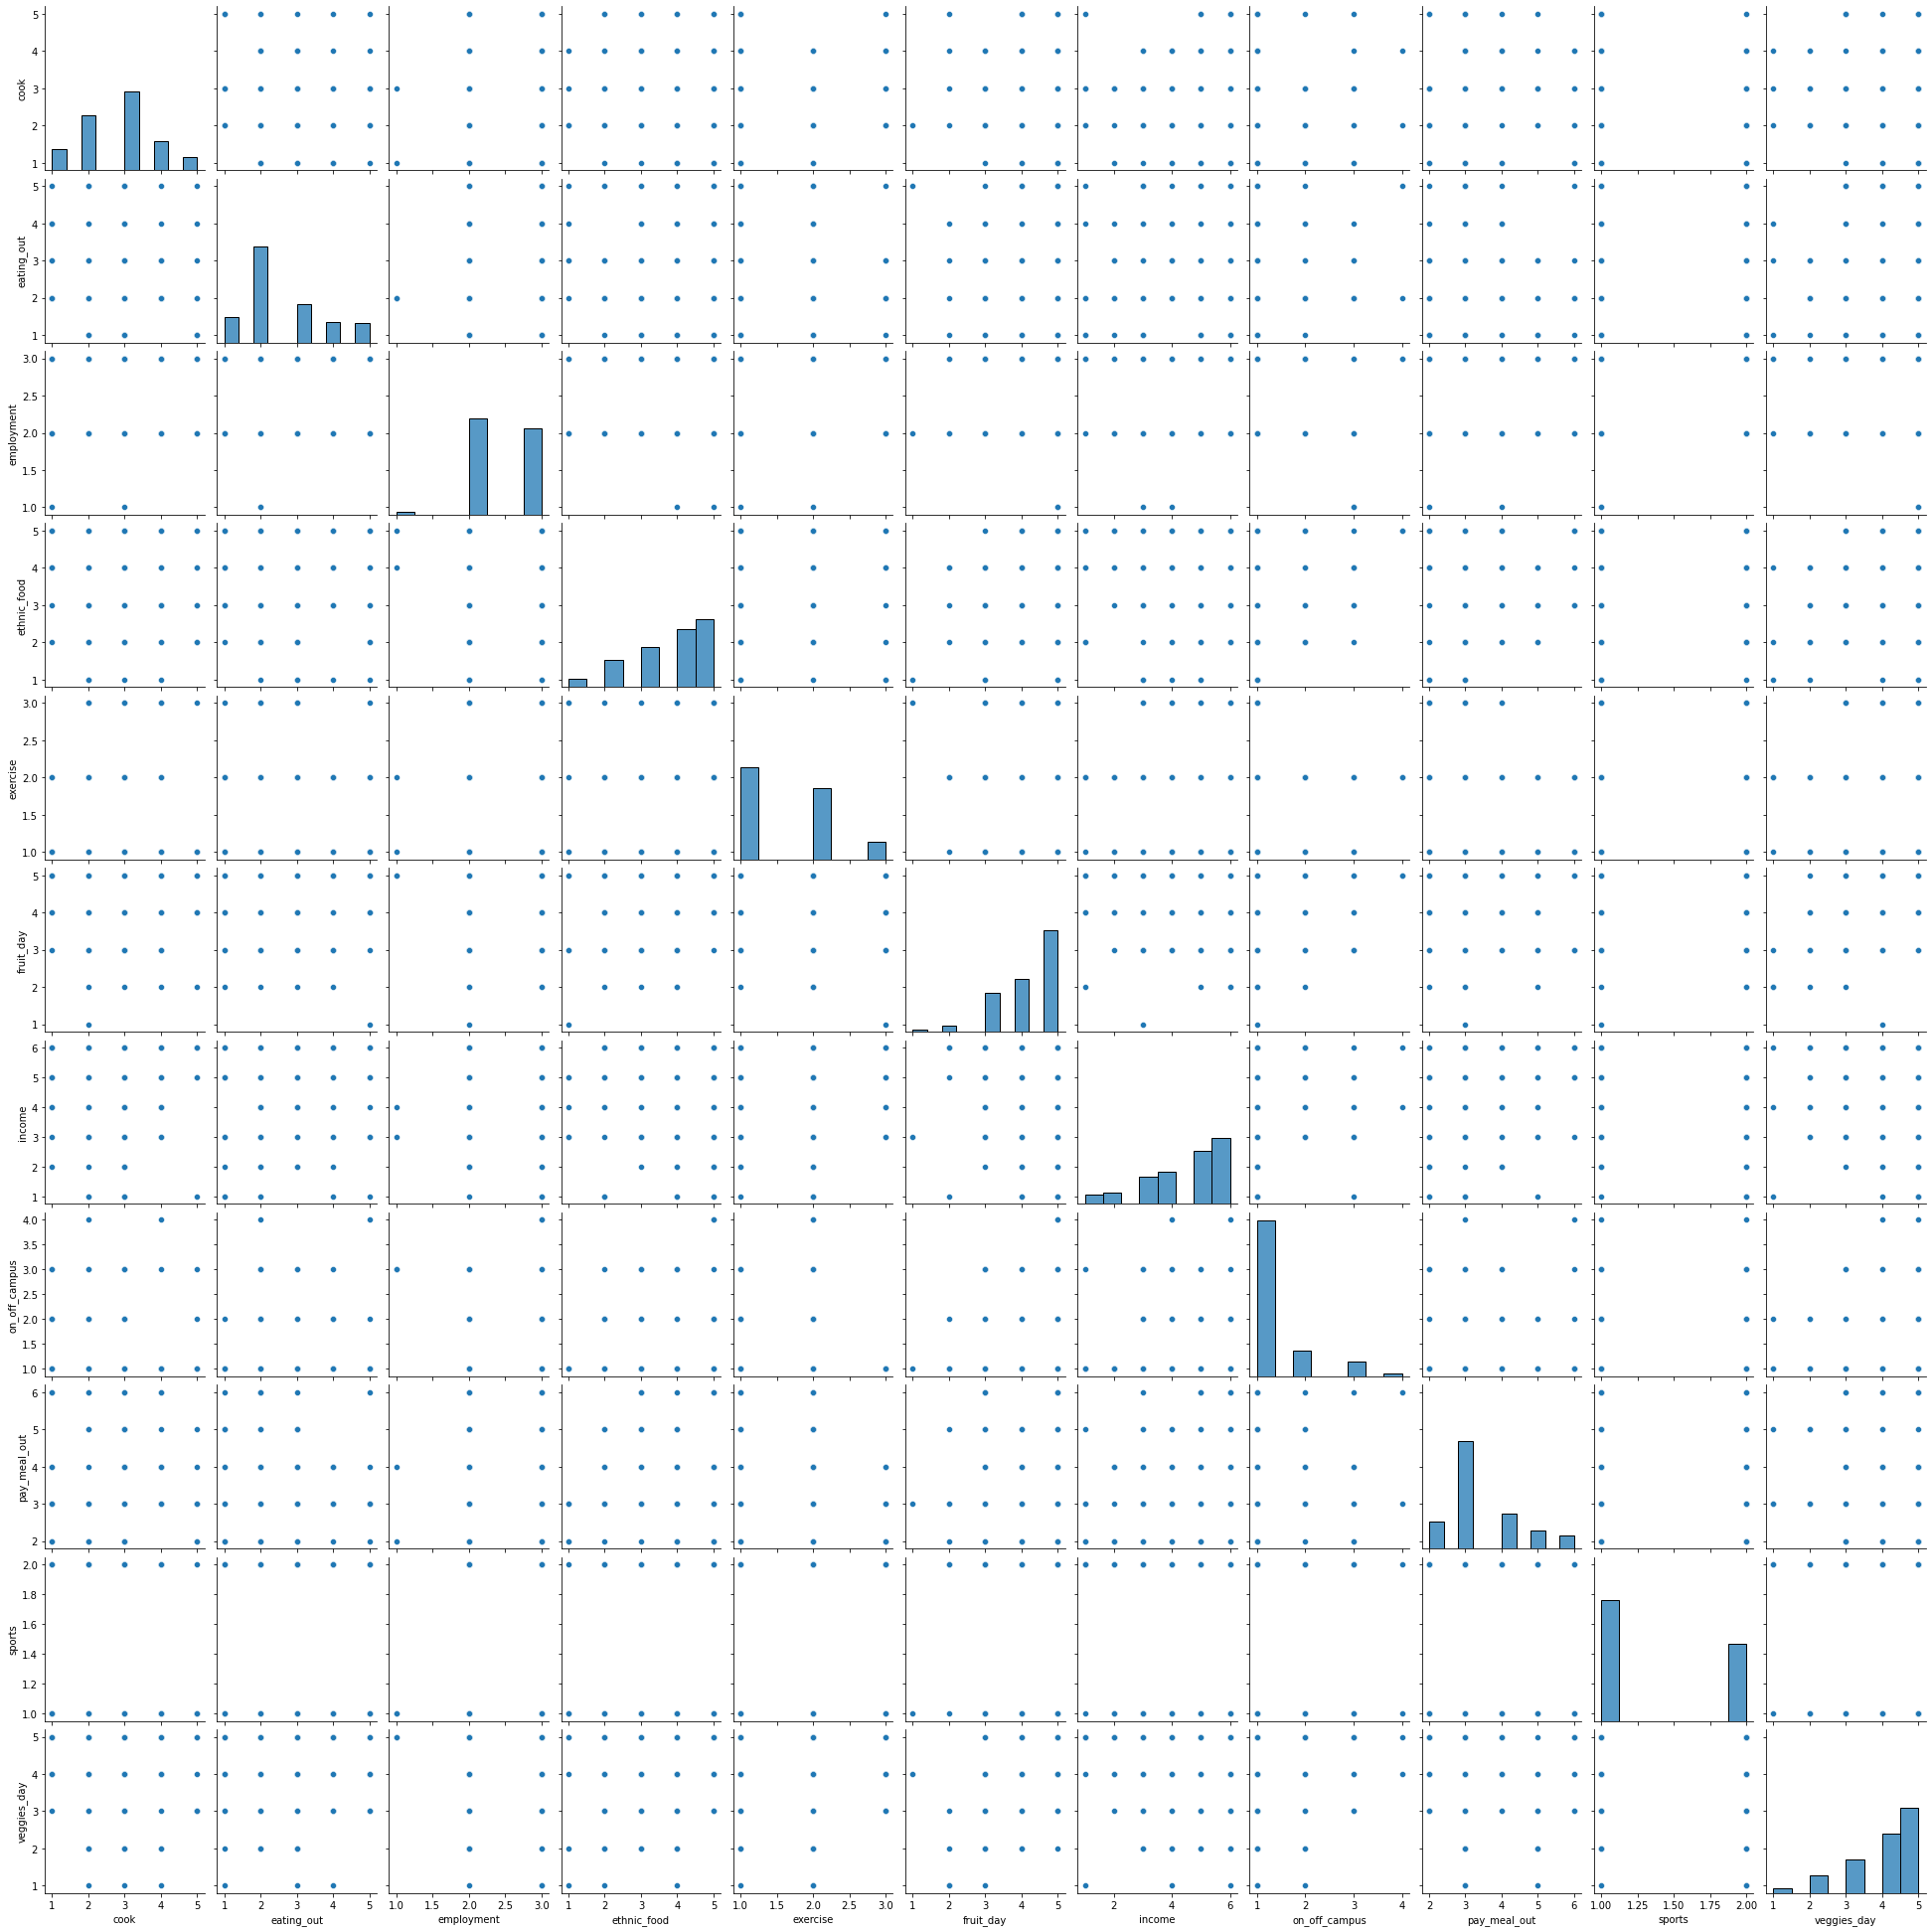

In [42]:
import seaborn as sns
sns.pairplot(d)

#Boxplot of Dataset

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'cook'),
 Text(0, 0, 'eating_out'),
 Text(0, 0, 'employment'),
 Text(0, 0, 'ethnic_food'),
 Text(0, 0, 'exercise'),
 Text(0, 0, 'fruit_day'),
 Text(0, 0, 'income'),
 Text(0, 0, 'on_off_campus'),
 Text(0, 0, 'pay_meal_out'),
 Text(0, 0, 'sports'),
 Text(0, 0, 'veggies_day')]

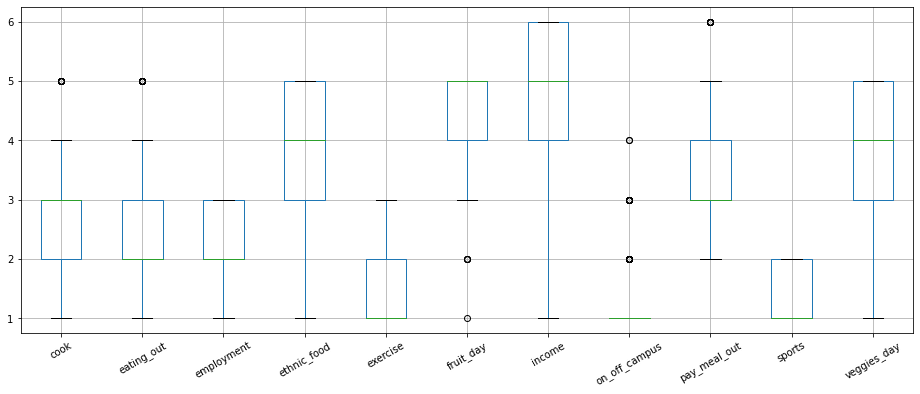

In [43]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
% matplotlib inline 
ax=d.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [44]:
d.shape

(125, 11)

In [45]:
s=d.dropna()

## Run KMeans Clustering on the data

In [46]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
import minisom

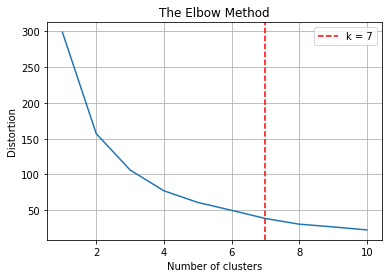

In [47]:
f=['cook','income']
X = s[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

## Get Geolocational Data

In [48]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [49]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    17.448372, 78.526957,
    30000, 
    LIMIT)

In [50]:
results = requests.get(url).json()

In [51]:
results

{'meta': {'code': 200, 'requestId': '6152e5a295238472a57584d7'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bac7d4df964a5205df73ae3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d11b941735',
         'name': 'Pub',
         'pluralName': 'Pubs',
         'primary': True,
         'shortName': 'Pub'}],
       'id': '4bac7d4df964a5205df73ae3',
       'location': {'address': 'Ground Floor, Lifestyle Building, Greenlands',
        'cc': 'IN',
        'city': 'Hyderabad',
        'country': 'India',
        'crossStreet': 'Begumpet Rd',
        'distance': 7512,
        'formattedAddress': ['Ground Floor, Lifestyle Building, Greenlands (Begumpet Rd)',
         'Hyderabad',
         'Telangana'

In [52]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [53]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood
0,e-0-4bac7d4df964a5205df73ae3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bac7d4df964a5205df73ae3,10 Downing Street,"Ground Floor, Lifestyle Building, Greenlands",Begumpet Rd,17.435868,78.457443,"[{'label': 'display', 'lat': 17.43586817493973...",7512,IN,Hyderabad,Telangana,India,"[Ground Floor, Lifestyle Building, Greenlands ...","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN,NaN
1,e-0-4c543cc0728920a13abe6a82-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c543cc0728920a13abe6a82,Kebabs & Kurries,"Greenlands Flyover, Greenlands, Punjagutta",NaN,17.432374,78.457585,"[{'label': 'display', 'lat': 17.43237414419468...",7579,IN,Hyderabad,Telangana,India,"[Greenlands Flyover, Greenlands, Punjagutta, H...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN
2,e-0-513afb90e4b04d69fd7cc3c7-2,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",5024,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],500080,NaN,NaN
3,e-0-4df9c65c62e1e9a24367f9e5-3,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],500029,NaN,NaN
4,e-0-4c08f54f6071a5934901dd32-4,0,"[{'summary': 'This spot is popular', 'type': '...",4c08f54f6071a5934901dd32,Nizam club,Saifabad,Opp public garden,17.403221,78.468729,"[{'label': 'display', 'lat': 17.40322092112925...",7969,IN,Hyderabad,Telangana,India,"[Saifabad (Opp public garden), Hyderabad 50000...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],500004,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4ff2c165e4b021f31db37701-95,0,"[{'summary': 'This spot is popular', 'type': '...",4ff2c165e4b021f31db37701,Ratnadeep Supermarket,kondapur,NaN,17.456187,78.364665,"[{'label': 'display', 'lat': 17.45618725850997...",17256,IN,NaN,NaN,India,"[kondapur, India]","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",0,[],NaN,NaN,NaN
96,e-0-4c81163ad92ea093375a3d72-96,0,"[{'summary': 'This spot is popular', 'type': '...",4c81163ad92ea093375a3d72,Shah Ghouse Cafe and Restaurant,Toli Chowli,M,17.396277,78.425094,"[{'label': 'display', 'lat': 17.3962770409263,...",12275,IN,Hyderabad,Telangana,India,"[Toli Chowli (M), Hyderabad 500058, Telangana,...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],500058,NaN,NaN
97,e-0-4e53e77bfa766dacedeb4342-97,0,"[{'summary': 'This spot is popular', 'type': '...",4e53e77bfa766dacedeb4342,The Bar,Novotel Hyderabad Convention Centre,NaN,17.472754,78.372853,"[{'label': 'display', 'lat': 17.47275385439036...",16587,IN,Hyderabad,Telangana,India,"[Novotel Hyderabad Convention Centre, Hyderaba...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],500081,NaN,NaN
98,e-0-5584f51c498e79deba660a09-98,0,"[{'summary': 'This spot is popular', 'type': '...",5584f51c498e79deba660a09,SPAR,SLN Terminus,NaN,17.452395,78.362934,"[{'label': 'display', 'lat': 17.45239462513268...",17424,IN,NaN,NaN,India,"[SLN Terminus, India]","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",0,[],NaN,NaN,NaN


In [54]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood
0,e-0-4bac7d4df964a5205df73ae3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bac7d4df964a5205df73ae3,10 Downing Street,"Ground Floor, Lifestyle Building, Greenlands",Begumpet Rd,17.435868,78.457443,"[{'label': 'display', 'lat': 17.43586817493973...",7512,IN,Hyderabad,Telangana,India,"[Ground Floor, Lifestyle Building, Greenlands ...","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN,NaN
1,e-0-4c543cc0728920a13abe6a82-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c543cc0728920a13abe6a82,Kebabs & Kurries,"Greenlands Flyover, Greenlands, Punjagutta",NaN,17.432374,78.457585,"[{'label': 'display', 'lat': 17.43237414419468...",7579,IN,Hyderabad,Telangana,India,"[Greenlands Flyover, Greenlands, Punjagutta, H...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN
2,e-0-513afb90e4b04d69fd7cc3c7-2,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",5024,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],500080,NaN,NaN
3,e-0-4df9c65c62e1e9a24367f9e5-3,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],500029,NaN,NaN
4,e-0-4c08f54f6071a5934901dd32-4,0,"[{'summary': 'This spot is popular', 'type': '...",4c08f54f6071a5934901dd32,Nizam club,Saifabad,Opp public garden,17.403221,78.468729,"[{'label': 'display', 'lat': 17.40322092112925...",7969,IN,Hyderabad,Telangana,India,"[Saifabad (Opp public garden), Hyderabad 50000...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],500004,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4ff2c165e4b021f31db37701-95,0,"[{'summary': 'This spot is popular', 'type': '...",4ff2c165e4b021f31db37701,Ratnadeep Supermarket,kondapur,NaN,17.456187,78.364665,"[{'label': 'display', 'lat': 17.45618725850997...",17256,IN,NaN,NaN,India,"[kondapur, India]","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",0,[],NaN,NaN,NaN
96,e-0-4c81163ad92ea093375a3d72-96,0,"[{'summary': 'This spot is popular', 'type': '...",4c81163ad92ea093375a3d72,Shah Ghouse Cafe and Restaurant,Toli Chowli,M,17.396277,78.425094,"[{'label': 'display', 'lat': 17.3962770409263,...",12275,IN,Hyderabad,Telangana,India,"[Toli Chowli (M), Hyderabad 500058, Telangana,...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],500058,NaN,NaN
97,e-0-4e53e77bfa766dacedeb4342-97,0,"[{'summary': 'This spot is popular', 'type': '...",4e53e77bfa766dacedeb4342,The Bar,Novotel Hyderabad Convention Centre,NaN,17.472754,78.372853,"[{'label': 'display', 'lat': 17.47275385439036...",16587,IN,Hyderabad,Telangana,India,"[Novotel Hyderabad Convention Centre, Hyderaba...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],500081,NaN,NaN
98,e-0-5584f51c498e79deba660a09-98,0,"[{'summary': 'This spot is popular', 'type': '...",5584f51c498e79deba660a09,SPAR,SLN Terminus,NaN,17.452395,78.362934,"[{'label': 'display', 'lat': 17.45239462513268...",17424,IN,NaN,NaN,India,"[SLN Terminus, India]","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",0,[],NaN,NaN,NaN


## Adding two more Columns Restaurant and Others
 

1.   Restaurant: Number of Restaurant in the radius of 20 km
2.   others:Number of Gyms, Parks,etc in the radius of 20 km




In [55]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-4bac7d4df964a5205df73ae3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bac7d4df964a5205df73ae3,10 Downing Street,"Ground Floor, Lifestyle Building, Greenlands",Begumpet Rd,17.435868,78.457443,"[{'label': 'display', 'lat': 17.43586817493973...",7512,IN,Hyderabad,Telangana,India,"[Ground Floor, Lifestyle Building, Greenlands ...","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN,NaN,26,17
1,e-0-4c543cc0728920a13abe6a82-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c543cc0728920a13abe6a82,Kebabs & Kurries,"Greenlands Flyover, Greenlands, Punjagutta",NaN,17.432374,78.457585,"[{'label': 'display', 'lat': 17.43237414419468...",7579,IN,Hyderabad,Telangana,India,"[Greenlands Flyover, Greenlands, Punjagutta, H...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN,39,28
2,e-0-513afb90e4b04d69fd7cc3c7-2,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",5024,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],500080,NaN,NaN,5,9
3,e-0-4df9c65c62e1e9a24367f9e5-3,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],500029,NaN,NaN,24,10
4,e-0-4c08f54f6071a5934901dd32-4,0,"[{'summary': 'This spot is popular', 'type': '...",4c08f54f6071a5934901dd32,Nizam club,Saifabad,Opp public garden,17.403221,78.468729,"[{'label': 'display', 'lat': 17.40322092112925...",7969,IN,Hyderabad,Telangana,India,"[Saifabad (Opp public garden), Hyderabad 50000...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],500004,NaN,NaN,19,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4ff2c165e4b021f31db37701-95,0,"[{'summary': 'This spot is popular', 'type': '...",4ff2c165e4b021f31db37701,Ratnadeep Supermarket,kondapur,NaN,17.456187,78.364665,"[{'label': 'display', 'lat': 17.45618725850997...",17256,IN,NaN,NaN,India,"[kondapur, India]","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",0,[],NaN,NaN,NaN,31,13
96,e-0-4c81163ad92ea093375a3d72-96,0,"[{'summary': 'This spot is popular', 'type': '...",4c81163ad92ea093375a3d72,Shah Ghouse Cafe and Restaurant,Toli Chowli,M,17.396277,78.425094,"[{'label': 'display', 'lat': 17.3962770409263,...",12275,IN,Hyderabad,Telangana,India,"[Toli Chowli (M), Hyderabad 500058, Telangana,...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],500058,NaN,NaN,21,2
97,e-0-4e53e77bfa766dacedeb4342-97,0,"[{'summary': 'This spot is popular', 'type': '...",4e53e77bfa766dacedeb4342,The Bar,Novotel Hyderabad Convention Centre,NaN,17.472754,78.372853,"[{'label': 'display', 'lat': 17.47275385439036...",16587,IN,Hyderabad,Telangana,India,"[Novotel Hyderabad Convention Centre, Hyderaba...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],500081,NaN,NaN,9,8
98,e-0-5584f51c498e79deba660a09-98,0,"[{'summary': 'This spot is popular', 'type': '...",5584f51c498e79deba660a09,SPAR,SLN Terminus,NaN,17.452395,78.362934,"[{'label': 'display', 'lat': 17.45239462513268...",17424,IN,NaN,NaN,India,"[SLN Terminus, India]","[{'id': '4bf58dd

## Changing the Column Name

In [56]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

## Install the minisom library using pip

MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display. Minisom is designed to allow researchers to easily build on top of it and to give students the ability to quickly grasp its details.

In [57]:
pip install minisom

## Run K Means clustering on the dataset, with the optimal K value using Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

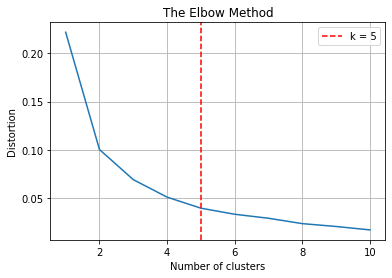

In [58]:
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [59]:
city = "Hyderabad"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, 500 002, India
[lat, long]: [17.360589, 78.4740613]


In [60]:
nearby_venues.head


<bound method NDFrame.head of                          referralId  reasons.count  ... restaurant others
0    e-0-4bac7d4df964a5205df73ae3-0              0  ...         26     17
1    e-0-4c543cc0728920a13abe6a82-1              0  ...         39     28
2    e-0-513afb90e4b04d69fd7cc3c7-2              0  ...          5      9
3    e-0-4df9c65c62e1e9a24367f9e5-3              0  ...         24     10
4    e-0-4c08f54f6071a5934901dd32-4              0  ...         19     16
..                              ...            ...  ...        ...    ...
95  e-0-4ff2c165e4b021f31db37701-95              0  ...         31     13
96  e-0-4c81163ad92ea093375a3d72-96              0  ...         21      2
97  e-0-4e53e77bfa766dacedeb4342-97              0  ...          9      8
98  e-0-5584f51c498e79deba660a09-98              0  ...         22     10
99  e-0-562fad3d498eec1b23682ab8-99              0  ...         50     19

[100 rows x 24 columns]>

In [61]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.postalCode', 'venue.venuePage.id',
       'venue.location.neighborhood', 'restaurant', 'others'],
      dtype='object')

##Data Cleaning Process for Extracting Necessary Columns in the Dataset

In [62]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [63]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

##New Dataset

In [64]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,17.435868,78.457443,"[Ground Floor, Lifestyle Building, Greenlands ...",26,17
1,17.432374,78.457585,"[Greenlands Flyover, Greenlands, Punjagutta, H...",39,28
2,17.423817,78.487257,"[Opposite Hussain Sagar Lake (Tank Bund Road),...",5,9
3,17.400678,78.488575,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,24,10
4,17.403221,78.468729,"[Saifabad (Opp public garden), Hyderabad 50000...",19,16
...,...,...,...,...,...
95,17.456187,78.364665,"[kondapur, India]",31,13
96,17.396277,78.425094,"[Toli Chowli (M), Hyderabad 500058, Telangana,...",21,2
97,17.472754,78.372853,"[Novotel Hyderabad Convention Centre, Hyderaba...",9,8
98,17.452395,78.362934,"[SLN Terminus, India]",22,10


## Dropping Nan Values from Dataset

In [65]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.435868,78.457443,"[Ground Floor, Lifestyle Building, Greenlands ...",26,17
1,17.432374,78.457585,"[Greenlands Flyover, Greenlands, Punjagutta, H...",39,28
2,17.423817,78.487257,"[Opposite Hussain Sagar Lake (Tank Bund Road),...",5,9
3,17.400678,78.488575,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,24,10
4,17.403221,78.468729,"[Saifabad (Opp public garden), Hyderabad 50000...",19,16
...,...,...,...,...,...
95,17.456187,78.364665,"[kondapur, India]",31,13
96,17.396277,78.425094,"[Toli Chowli (M), Hyderabad 500058, Telangana,...",21,2
97,17.472754,78.372853,"[Novotel Hyderabad Convention Centre, Hyderaba...",9,8
98,17.452395,78.362934,"[SLN Terminus, India]",22,10


###Convert Every Row of Column ***'venue.location.formattedAddress'*** from List to String

In [66]:
n['venue.location.formattedAddress']

0     [Ground Floor, Lifestyle Building, Greenlands ...
1     [Greenlands Flyover, Greenlands, Punjagutta, H...
2     [Opposite Hussain Sagar Lake (Tank Bund Road),...
3     [Himayatnagar (Narayanguda-himayat Nagar X Roa...
4     [Saifabad (Opp public garden), Hyderabad 50000...
                            ...                        
95                                    [kondapur, India]
96    [Toli Chowli (M), Hyderabad 500058, Telangana,...
97    [Novotel Hyderabad Convention Centre, Hyderaba...
98                                [SLN Terminus, India]
99    [Opp. Cyber Towers, Near Mainland China, Hyder...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [76]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points

## add html legend


## plot the map
map_

In [68]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [69]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.435868,78.457443,"'Ground Floor, Lifestyle Building, Greenlands...",26,17
1,17.432374,78.457585,"'Greenlands Flyover, Greenlands, Punjagutta',...",39,28
2,17.423817,78.487257,'Opposite Hussain Sagar Lake (Tank Bund Road)...,5,9
3,17.400678,78.488575,'Himayatnagar (Narayanguda-himayat Nagar X Ro...,24,10
4,17.403221,78.468729,"'Saifabad (Opp public garden)', 'Hyderabad 50...",19,16
...,...,...,...,...,...
95,17.456187,78.364665,"'kondapur', 'India'",31,13
96,17.396277,78.425094,"'Toli Chowli (M)', 'Hyderabad 500058', 'Telan...",21,2
97,17.472754,78.372853,"'Novotel Hyderabad Convention Centre', 'Hyder...",9,8
98,17.452395,78.362934,"'SLN Terminus', 'India'",22,10


#Plot the clustered locations on a map

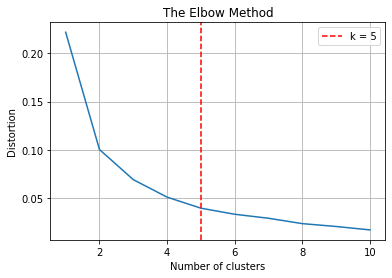

In [70]:
X = n[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()


In [71]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,17.435868,78.457443,"'Ground Floor, Lifestyle Building, Greenlands...",26,17,1,0
1,17.432374,78.457585,"'Greenlands Flyover, Greenlands, Punjagutta',...",39,28,1,0
2,17.423817,78.487257,'Opposite Hussain Sagar Lake (Tank Bund Road)...,5,9,4,0
3,17.400678,78.488575,'Himayatnagar (Narayanguda-himayat Nagar X Ro...,24,10,4,0
4,17.403221,78.468729,"'Saifabad (Opp public garden)', 'Hyderabad 50...",19,16,4,0
...,...,...,...,...,...,...,...
95,17.456187,78.364665,"'kondapur', 'India'",31,13,3,0
96,17.396277,78.425094,"'Toli Chowli (M)', 'Hyderabad 500058', 'Telan...",21,2,0,0
97,17.472754,78.372853,"'Novotel Hyderabad Convention Centre', 'Hyder...",9,8,3,0
98,17.452395,78.362934,"'SLN Terminus', 'India'",22,10,3,0


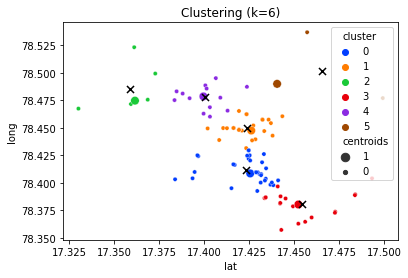

In [72]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [73]:
model = cluster.AffinityPropagation()


Text(0.5, 1.0, 'Clustering (k=6)')

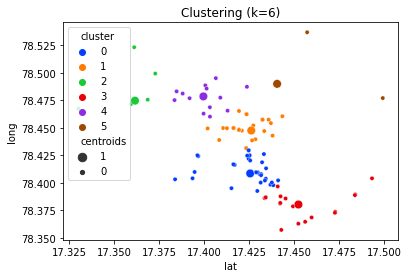

In [74]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [75]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_

## ***Thankyou***